# Monitoring of model
 Evaluate model on data and obtain metrics of performance

## Load libraries

In [1]:
pip install tabgan==1.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 41.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 87.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 24.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 30.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install lightgbm

In [3]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.12.0
    Uninstalling scipy-1.12.0:
      Successfully uninstalled scipy-1.12.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade pandas "dask[complete]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 35.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.5/205.5 kB 3.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
  Attempting uninstall: dask
    Found existing installation: dask 2024.3.1
    Uninstalling dask-2024.3.1:
      Successfully uninstalled dask-2024.3.1
  Attempting uninstall: distributed
    Found existing installation: distributed 2024.3.1
    Uninstalling distributed-2024.3.1:
      Successfully uninstalled distributed-2024.3.1
  Attempting uninstall: dask-expr
    Found existing installation: dask-expr 1.0.5
    Uninstalling dask-expr-1.0.5:
      Successfully uninstalled dask-expr-1.0.5
ERROR: pip's dependen

In [6]:
## librerias requeridas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import re
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_lift_curve
from scikitplot.helpers import binary_ks_curve 
from scikitplot.metrics import plot_ks_statistic
from scikitplot.helpers import cumulative_gain_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from datetime import datetime, timedelta

import pyarrow as pa
import pyarrow.parquet as pq

In [7]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.memory_usage', True)

## Load model and data to evaluate

Load variables names from file

In [8]:
import os
os.getcwd()

'/home/ec2-user/SageMaker/viamericas-dev/Analytics/5.Fraud'

In [9]:
import os
import joblib
# load model
#modelo = joblib.load("ModeloV2TodosMenosVariables.pkl") 
#variables = open('./ModeloV2TodosMenosVariables.txt','r')
modelo = joblib.load("ModeloBite0.pkl") 
variables = open('./ModeloBite0.txt','r')

In [10]:
modelo

LGBMClassifier(colsample_bytree=0.84, importance_type='gini',
               learning_rate=0.07, max_depth=20, min_child_weight=0.0026,
               n_estimators=520, num_leaves=30, objective='binary',
               scale_pos_weight=0.003, subsample=1)

## Veo si puedo sacar los nombres directo del modelo q cargue
## Veo como cargar el punto de corte

In [11]:
variables = open('./ModeloBite.txt','r')
var_input = variables.read()

In [12]:
#1er prueba
var_input = ['branch_minutes_since_last_transaction',
    'branch_trans_3m',  'branch_has_fraud',  
    'branch_trans_40min', 'branch_trans_10min', 'cash_pick_up_40min', 
    'location_nro_fraud', 'sender_trans_3m', 
    'sender_nro_fraud','01_isMexico', 
    '01_sender_branch_state', '01_var_range_hist', 
    '01_branch_fraud', '01_location_fraud', '01_sender_fraud', 
    '01_isCashPick', '01_isBankDep', 
    'sender_days_to_last_transaction_more7m', 
    '01_receiver_transaction_count','01_sender_sending_days',
    '01_branch_working_days', '01_net_amount_receiver', 
    '01_sender_minutes_since_last_transaction_2days', 
    '01_sender_days_to_last_transaction_365', 
    '01_sender_days_to_last_transaction_7m', '01_hour_receiver']

#2da prueba
var_input = ['branch_minutes_since_last_transaction',
    'branch_trans_3m',  'branch_has_fraud',  
    'branch_trans_40min', 'branch_trans_10min', 'cash_pick_up_40min', 
    'location_nro_fraud', 'sender_trans_3m', 
    'sender_nro_fraud','01_isMexico', 
    '01_sender_branch_state', '01_var_range_hist', 
    '01_branch_fraud', '01_location_fraud',
    '01_isCashPick', '01_isBankDep', 
    'sender_days_to_last_transaction_more7m', 
    'receiver_transaction_count','01_sender_sending_days',
    'branch_working_days', '01_net_amount_receiver', 
    'sender_minutes_since_last_transaction_2days', 
    'sender_days_to_last_transaction_365', 
    'sender_days_to_last_transaction_7m', '01_hour_receiver']

In [13]:
s3_url = f"viamericas-datalake-dev-us-east-1-283731589572-raw/FraudModel/Data4Model/TargetTodos"
dfTrain = pd.read_parquet(f"s3://{s3_url}/Train/Train.parquet")
tgTrain = dfTrain['target']

dfVal = pd.read_parquet(f"s3://{s3_url}/Validation/Validation.parquet")
tgVal = dfVal['target']

#Uni test y Val
#X = pd.concat([dfTrain[var_input], dfVal[var_input]], ignore_index=True) 
X = pd.concat([dfTrain, dfVal], ignore_index=True) 
Y = pd.DataFrame(pd.concat([dfTrain['target'], dfVal['target']], ignore_index=True)) 

dias_target = ['day_name_receiver_0', 'day_name_receiver_1',
       'day_name_receiver_2', 'day_name_receiver_3',
       'day_name_receiver_4', 'day_name_receiver_5',
       'day_name_receiver_6','target']

testeo =  pd.concat([X, Y], axis=1)
Y_target = pd.DataFrame(pd.concat([dfTrain[dias_target], dfVal[dias_target]], ignore_index=True)) 

In [14]:
# Uso esto para sacar el punto de corte. Cuando lo pueda guardar esta celda se va
# Prediciendo la variable objetivo para el conjunto de datos de prueba 'X_TESTEO' utilizando el clasificador LightGBM
testeo_data_pred_rf = modelo.predict(testeo[var_input])

# Prediciendo las probabilidades de clase para cada observación en 'X_TESTEO' utilizando el clasificador LightGBM
probab_rf = modelo.predict_proba(testeo[var_input])

# Eliminando la primera columna (se asume que son las probabilidades de la clase negativa) de las probabilidades predichas
# Se asume que la segunda columna contiene las probabilidades para la clase positiva
score_rf = np.delete(probab_rf, np.s_[0], axis=1)

# Creando una copia del DataFrame 'Y_c' para preservar los datos originales
Y_c = Y_target.copy()

# Agregando una nueva columna 'preds_rf' al DataFrame copiado con las predicciones del clasificador LightGBM
Y_c['preds_rf'] = testeo_data_pred_rf

# Agregando una nueva columna 'score_rf' al DataFrame copiado con las probabilidades de la clase positiva
Y_c['score_rf'] = score_rf

#Calculo el primer percentil para sacar el punto de corte
percentiles = pd.qcut(Y_c['score_rf'], q=1000, duplicates='drop')
percentile_label = {p: l for l, p in enumerate(sorted(percentiles.unique(), reverse=True), start=1)}
percentiles = percentiles.map(percentile_label)
Y_c['FRAUD_DECILE'] = np.nan
Y_c['FRAUD_DECILE'] = percentiles
Y_c['FRAUD_DECILE'] = Y_c['FRAUD_DECILE'].astype('Int32')

#saco el punto de corte del primer centil para aplicarlo al test
corte_01 = Y_c.score_rf[Y_c['FRAUD_DECILE']==1].min()
corte_02 = Y_c.score_rf[Y_c['FRAUD_DECILE']==2].min()
corte_03 = Y_c.score_rf[Y_c['FRAUD_DECILE']==3].min()
corte_04 = Y_c.score_rf[Y_c['FRAUD_DECILE']==4].min()
corte = Y_c.score_rf[Y_c['FRAUD_DECILE']==10].min()

In [15]:
corte

1.5563748356262784e-08

In [16]:
corte_02

2.988086121977681e-07

In [17]:
Y_c['pred_corte'] = Y_c['score_rf']>corte_01
pd.DataFrame(confusion_matrix(Y_c['target'], Y_c['pred_corte']))

,0,1
0,16708131,16142
1,13,582


In [18]:
s3_url = f"viamericas-datalake-dev-us-east-1-283731589572-raw/FraudModel/Data4Model/TargetTodos"
tes = pd.read_parquet(f"s3://{s3_url}/Test/Test.parquet")

testeo = pd.concat([X, tes], axis = 0, ignore_index=True)
Y_target = pd.DataFrame(pd.concat([Y_target, tes[dias_target]], ignore_index=True)) 

In [19]:
s3_url = f"viamericas-datalake-dev-us-east-1-283731589572-raw/FraudModel/Data4Model/TargetTodos"
tes = pd.read_parquet(f"s3://{s3_url}/Data2024/Data2024.parquet")

testeo = pd.concat([testeo, tes], axis = 0, ignore_index=True)
Y_target = pd.DataFrame(pd.concat([Y_target, tes[dias_target]], ignore_index=True)) 

## Apply model

In [20]:
def limpiar_nombres_columnas(dataframe):
    """
    Limpia y estandariza los nombres de las columnas en un DataFrame.

    Parameters:
    - dataframe: DataFrame de pandas.

    Returns:
    - DataFrame con nombres de columnas limpios.
    """
    dataframe = dataframe.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
    return dataframe

testeo = limpiar_nombres_columnas(testeo)

In [21]:
testeo['target'].value_counts(dropna=False)

target
False    32966471
True          818
Name: count, dtype: int64

In [22]:
Y_target.shape

(32967289, 8)

In [23]:
#replace nan with 0
#testeo['01_sender_minutes_since_last_transaction_2days'] = testeo['01_sender_minutes_since_last_transaction_2days'].fillna(0)
#testeo['01_sender_days_to_last_transaction_365'] = testeo['01_sender_days_to_last_transaction_365'].fillna(0)
#testeo['01_sender_days_to_last_transaction_7m'] = testeo['01_sender_days_to_last_transaction_7m'].fillna(0)

In [24]:
# Prediciendo la variable objetivo para el conjunto de datos de prueba 'X_TESTEO' utilizando el clasificador LightGBM
testeo_data_pred_rf = modelo.predict(testeo[var_input])

# Prediciendo las probabilidades de clase para cada observación en 'X_TESTEO' utilizando el clasificador LightGBM
probab_rf = modelo.predict_proba(testeo[var_input])

# Eliminando la primera columna (se asume que son las probabilidades de la clase negativa) de las probabilidades predichas
# Se asume que la segunda columna contiene las probabilidades para la clase positiva
score_rf = np.delete(probab_rf, np.s_[0], axis=1)


In [25]:
# Creando una copia del DataFrame 'Y_TESTEO' para preservar los datos originales
Y_c = Y_target.copy()

# Agregando una nueva columna 'preds_rf' al DataFrame copiado con las predicciones del clasificador LightGBM
Y_c['preds_rf'] = testeo_data_pred_rf

# Agregando una nueva columna 'score_rf' al DataFrame copiado con las probabilidades de la clase positiva
Y_c['score_rf'] = score_rf

In [26]:
pd.DataFrame(confusion_matrix(Y_c['target'], Y_c['preds_rf']))

,0,1
0,32966455,16
1,309,509


In [27]:
Y_c['pred_corte'] = Y_c['score_rf']>corte
pd.DataFrame(confusion_matrix(Y_c['target'], Y_c['pred_corte']))

,0,1
0,32635747,330724
1,37,781


<Axes: xlabel='score_rf', ylabel='Count'>

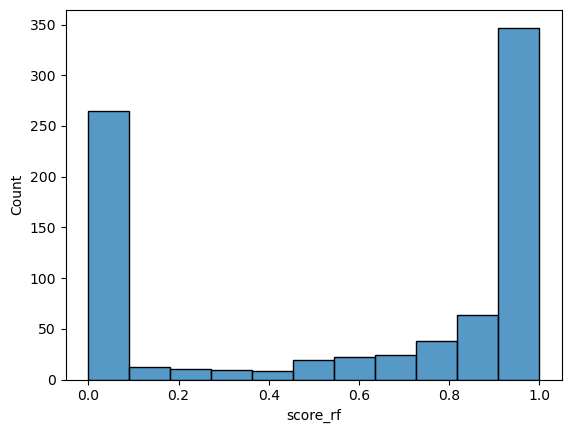

In [28]:
import seaborn as sns
sns.histplot(data = Y_c[Y_c['target'] == True], x='score_rf')

In [29]:
# Dividir las predicciones en deciles y calcular la captura del 30% en el conjunto de entrenamiento
percentiles = pd.qcut(Y_c['score_rf'], q=100, duplicates='drop')
percentile_label = {p: l for l, p in enumerate(sorted(percentiles.unique(), reverse=True), start=1)}
percentiles = percentiles.map(percentile_label)
Y_c['FRAUD_DECILE'] = np.nan
Y_c['FRAUD_DECILE'] = percentiles
Y_c['FRAUD_DECILE'] = Y_c['FRAUD_DECILE'].astype('Int32')
print('FRAUD CAPTURA 30%:')
print(sum(Y_c[Y_c['FRAUD_DECILE'] < 4]['target']) / sum(Y_c['target']))

FRAUD CAPTURA 30%:
0.9767726161369193


In [30]:
DECILES = pd.crosstab(Y_c['FRAUD_DECILE'], Y_c['target'])
DECILES

target,False,True
FRAUD_DECILE,,
1,328892,781
2,329661,12
3,329667,6
4,329670,3
5,329670,3
...,...,...
96,329673,0
97,329673,0
98,329673,0


In [31]:
Y_c[['score_rf','FRAUD_DECILE']].groupby(['FRAUD_DECILE']).agg({'score_rf': [ 'min', 'max']}) 

score_rf              
                       min           max
FRAUD_DECILE                            
1             1.572659e-08  9.999999e-01
2             4.401747e-09  1.572657e-08
3             2.117296e-09  4.401725e-09
4             1.267751e-09  2.117295e-09
5             8.511095e-10  1.267751e-09
...                    ...           ...
96            2.869913e-13  3.402085e-13
97            2.334966e-13  2.869912e-13
98            1.780221e-13  2.334966e-13
99            1.166592e-13  1.780220e-13
100           2.629984e-15  1.166591e-13

[100 rows x 2 columns]

In [32]:
#PERC = pd.crosstab(Y_c.FRAUD_DECILE[testeo['mes']>8], Y_c.target[testeo['mes']>8])
#PERC.to_csv ('./percentiles.csv')

## Analizo distintos puntos de corte

In [33]:
testeo['date_receiver'].dt.month
testeo['year'] = testeo['date_receiver'].dt.year
Y_c['fraud_classification'] = testeo['fraud_classification']
Y_c['targetF'] = (testeo['fraud_classification']=='Real')

In [34]:
#Veo cuantos falsos positivos tengo con el punto de corte
Y_c['pred_corte_01'] = Y_c['score_rf']>corte_01
tes_corte_01 = testeo[Y_c['pred_corte_01']==True]
Y_c_corte_01 = Y_c[Y_c['pred_corte_01']==True]

pd.crosstab(tes_corte_01['mes'], Y_c_corte_01['targetF'])

targetF,False,True
mes,,
1,3551,78
2,3666,37
3,6569,24
4,2065,61
5,2068,45
6,2116,65
7,2175,30
8,2272,37
9,2464,26


In [35]:
pd.crosstab(tes_corte_01['date_receiver'].dt.year, Y_c_corte_01['targetF'])

targetF,False,True
date_receiver,,
2023,26288,418
2024,8113,22


In [36]:
#Veo cuantos falsos positivos tengo con el punto de corte
Y_c['pred_corte_02'] = Y_c['score_rf']>corte_02
tes_corte_02 = testeo[Y_c['pred_corte_02']==True]
Y_c_corte_02 = Y_c[Y_c['pred_corte_02']==True]

pd.crosstab(tes_corte_02['mes'], Y_c_corte_02['targetF'])

targetF,False,True
mes,,
1,7391,83
2,7445,37
3,11227,26
4,4201,61
5,4207,45
6,4243,66
7,4372,30
8,4551,37
9,4868,31


In [37]:
#Veo cuantos falsos positivos tengo con el punto de corte
Y_c['pred_corte_03'] = Y_c['score_rf']>corte_03
tes_corte_03 = testeo[Y_c['pred_corte_03']==True]
Y_c_corte_03 = Y_c[Y_c['pred_corte_03']==True]

pd.crosstab(tes_corte_03['mes'], Y_c_corte_03['targetF'])

targetF,False,True
mes,,
1,11203,84
2,11333,39
3,15734,26
4,6264,61
5,6340,45
6,6437,68
7,6575,30
8,6773,37
9,7357,33


In [38]:
#Veo cuantos falsos positivos tengo con el punto de corte
Y_c['pred_corte_04'] = Y_c['score_rf']>corte_04
tes_corte_04 = testeo[Y_c['pred_corte_04']==True]
Y_c_corte_04 = Y_c[Y_c['pred_corte_04']==True]

pd.crosstab(tes_corte_04['mes'], Y_c_corte_04['targetF'])

targetF,False,True
mes,,
1,15072,84
2,15229,39
3,20187,27
4,8331,61
5,8485,45
6,8638,68
7,8829,30
8,8995,37
9,9709,35


In [39]:
pd.crosstab(tes_corte_04['date_receiver'].dt.year, Y_c_corte_04['targetF'])

targetF,False,True
date_receiver,,
2023,105799,442
2024,27226,32


## Curva ROC y FP

In [40]:
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_lift_curve
from scikitplot.helpers import binary_ks_curve
from scikitplot.metrics import plot_ks_statistic
from scikitplot.helpers import cumulative_gain_curve

In [41]:
# Calcular la curva de ganancia acumulativa y el LIFT del modelo en el conjunto de entrenamiento
classes = np.unique(Y_c[['target']])
percentages, gains = cumulative_gain_curve(Y_c[['target']], Y_c['score_rf'], classes[1])
percentages = percentages[1:]
gains = gains[1:]
gains = gains / percentages
indice = round(len(gains) * 0.1)
print('LIFT FRAUD TESTEO:')
print(gains[indice])

# Calcular el área bajo la curva ROC del modelo en el conjunto de entrenamiento
print('ROC FRAUD TESTEO:')
print(roc_auc_score(Y_c[['target']], Y_c['pred_corte']))

# Calcular la estadística KS del modelo en el conjunto de entrenamiento
thresholds, pct1, pct2, ks_statistic, max_distance_at, classes = binary_ks_curve(Y_c[['target']], Y_c['score_rf'])
print('KS FRAUD TESTEO:')
print(ks_statistic)

# Calcular la precisión y el recall del modelo en el conjunto de entrenamiento
precision = precision_score(Y_c[['target']], Y_c['pred_corte'])
recall = recall_score(Y_c[['target']], Y_c['pred_corte'])
print('Precision FRAUD TESTEO:')
print(precision)
print('Recall FRAUD TESTEO:')
print(recall)

LIFT FRAUD TESTEO:
9.902197184990086
ROC FRAUD TESTEO:
0.9723677969084819


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KS FRAUD TESTEO:
0.9508550406706221
Precision FRAUD TESTEO:
0.002355922233450476
Recall FRAUD TESTEO:
0.9547677261613692


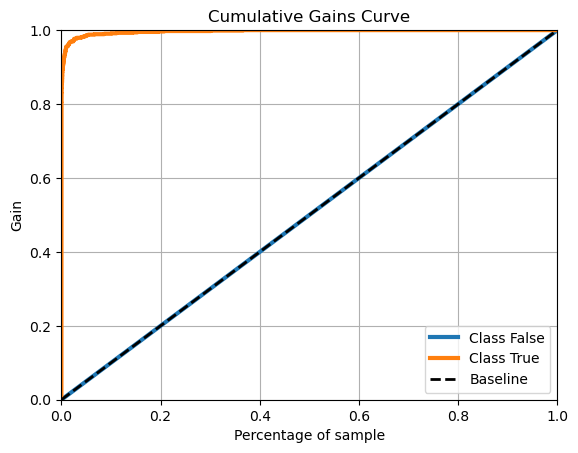

In [42]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_true=Y_c[['target']], y_probas =  probab_rf)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


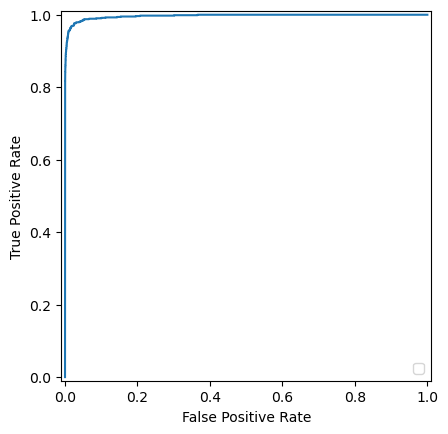

In [43]:
from sklearn.metrics import RocCurveDisplay, roc_curve

fpr, tpr, _ = roc_curve(Y_c[['target']], score_rf)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

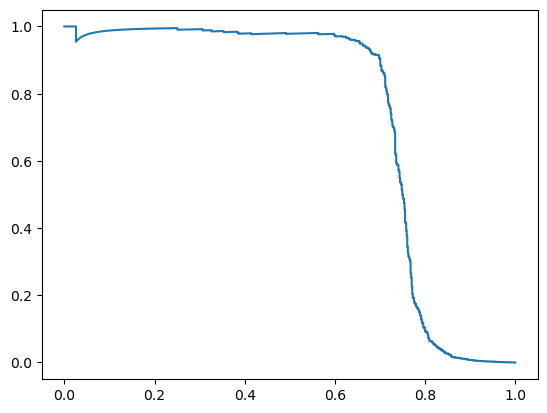

In [44]:
precision, recall, thresholds = skplt.metrics.precision_recall_curve(Y_c[['target']], score_rf)
plt.plot(recall, precision)

In [45]:
recall[recall>0.8].min() # 0.8010540184453228
precision[precision>0.8].min() #0.8002832861189801

0.8002735978112175

## Monthly analysis

In [46]:
pd.crosstab(testeo['mes'], Y_c['target'])

target,False,True
mes,,
1,3732738,146
2,3887100,72
3,4381826,61
4,2116204,87
5,2289892,69
6,2193663,101
7,2314224,50
8,2296945,68
9,2420668,75


In [47]:
#Veo cuantos falsos positivos tengo con el punto de corte
tes_corte = testeo[Y_c['pred_corte']==True]
Y_c_corte = Y_c[Y_c['pred_corte']==True]

pd.crosstab(tes_corte['mes'], Y_c_corte['target'])

target,False,True
mes,,
1,38616,143
2,39091,68
3,47380,53
4,20671,86
5,21331,69
6,21965,100
7,22354,50
8,22109,68
9,23849,66


In [48]:
Tabla_mes = pd.DataFrame(pd.concat([testeo['mes'],testeo['fraud_classification'], 
                                     Y_c['FRAUD_DECILE'], Y_c['target']],axis=1))

In [49]:
Tabla_mes[Tabla_mes['target']==True]
pd.crosstab(Tabla_mes.mes, Tabla_mes.FRAUD_DECILE)

FRAUD_DECILE,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,38535,38934,39210,38574,38554,38390,38412,38244,38417,38183,38128,38131,38069,37729,38239,37766,37625,37871,38140,37872,37866,38180,37809,38183,37916,38310,37749,38313,37893,38397,38201,38161,38153,37787,38198,37607,37610,37906,37834,38092,37702,38165,38039,37861,38067,37807,37962,37866,38121,37996,37974,38001,37520,38283,37520,37688,37564,37133,37488,37509,37670,37390,37411,37540,37554,37386,37581,37274,37463,37191,37215,37309,37157,37243,36940,36887,36833,36786,36790,36512,36257,36496,36233,35979,35875,36002,35438,35697,35647,35411,35350,35129,35061,34578,34949,34923,34477,34100,34372,35324
2,38926,39807,39797,39675,39673,39823,39177,39452,39549,39349,39477,39397,39292,39215,39715,39259,39536,39334,39293,39108,39457,39174,39263,39284,39423,39187,39549,39261,39444,39341,38962,39311,39309,39332,38963,39206,39289,39163,39333,39326,39243,38938,38914,39091,39042,39104,38827,39235,39010,39016,38948,38902,39137,38576,39100,39095,38799,38911,38956,38944,38716,38589,38853,38767,38747,38818,38504,38371,38288,38586,38688,38676,38581,38468,38601,38469,38244,38732,38516,38428,38113,38637,38388,38338,38319,38303,38183,37947,38197,38057,38136,37930,37498,37568,37759,37484,37692,37692,38276,38794
3,47177,45390,45557,45661,45735,44961,45455,45204,45341,44886,45045,44917,45201,44534,44774,44839,44947,44890,44444,44814,44281,44570,44868,44568,44562,44280,44501,44303,44465,44427,44055,44146,43915,44187,44571,44290,44315,44348,44167,44124,44126,44004,43895,43830,44096,44004,43684,43733,43810,44028,43851,44456,43887,43545,43493,43564,43346,43640,43565,43543,43477,43542,43335,43515,43313,42801,43455,43463,43216,43162,43468,42949,42965,42948,43260,43165,43012,42800,43005,43008,43232,42910,42864,42874,43073,42966,43016,42987,42894,42686,42671,42609,42491,43040,42249,41904,42072,42031,41778,40866
4,20657,20323,20076,20089,20209,20276,20344,20437,20480,20386,20358,20346,20439,20721,20673,20499,20718,20600,20641,20761,20587,20719,20516,20440,20681,20858,20610,20856,20750,20512,20795,20714,20839,20888,20955,20837,20903,21104,20624,20719,20701,20710,21087,20926,21153,21103,21155,21175,21060,20687,20984,20910,21025,20825,21008,21224,21242,21194,21220,21000,21503,21189,21036,21071,20961,21188,21322,21389,21375,21444,21462,21398,21355,21513,21590,21607,21627,21697,21647,21686,21998,21809,22052,21963,22092,21905,22132,21968,22014,22050,22234,22315,22077,22250,22291,22635,22702,22723,22354,22338
5,21269,21784,21969,22254,22233,22490,22544,22268,22296,22635,22561,22390,22580,22400,22332,22797,22720,22668,22579,22581,22524,22663,22561,22479,22430,22555,22751,22676,22745,22511,22591,22474,22679,22807,22572,22880,23010,22620,22678,22645,22610,22871,22668,22781,22720,22957,22805,22923,22704,22992,22784,22608,22838,22785,23051,22883,23155,22945,23092,22706,22832,23056,23086,22871,23101,23103,23008,22942,22782,22801,23166,23101,23099,22878,23172,23273,23189,23177,23048,23376,23187,23318,23425,23246,23281,23585,23288,23504,23750,23559,23671,23668,23839,23718,23798,23481,23804,24011,23769,23919
6,21937,23185,22961,23163,23349,23072,23124,23230,22980,23010,22763,23264,22869,22986,22644,22712,22425,22587,22716,22803,22610,22604,22415,22458,22459,22618,22432,22380,22286,22283,22352,22159,22404,22305,22155,22368,22109,22081,21951,22046,22108,22249,22171,22045,21847,22043,21921,21760,22111,21862,21971,21836,21804,21720,21797,21756,21940,22052,21933,21532,21623,21544,21836,21494,21616,21594,21514,21769,21470,21640,21488,21663,21421,21427,21539,21259,21387,21518,21468,21276,21564,21358,21156,21363,21263,21389,21296,21139,20859,21070,21131,20864,20973,21159,20763,20752,206

In [50]:
pd.crosstab(Tabla_mes.mes[Tabla_mes['target']==True], Tabla_mes.FRAUD_DECILE[Tabla_mes['target']==True])

FRAUD_DECILE,1,2,3,4,5,6,7,9,11,12,15,16,20,21,31,37
mes,,,,,,,,,,,,,,,,
1,143,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,68,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,53,5,2,0,0,0,0,0,0,0,0,0,0,0,0,1
4,86,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,100,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,66,1,2,1,1,0,1,0,0,0,1,0,1,0,1,0


In [51]:
Tabla_mes.loc[Tabla_mes['target']==True,['mes','fraud_classification','FRAUD_DECILE']]

,mes,fraud_classification,FRAUD_DECILE
99521,1,Real,1
136425,2,Distraction,1
166402,3,Distraction,1
180042,6,Real,1
187184,1,Distraction,1
...,...,...,...
31918511,3,Real,3
32220826,3,Real,2
32669531,3,Real,3
32748885,3,Real,2


# Monthly indicators

In [52]:
i = 0
summary_metrics = pd.DataFrame(columns = ['month','year', 'precision', 'recall','alerts','frauds&dist','frauds','detected'] )
for y in  testeo['year'].unique():
    for m in  testeo['mes'].unique():
        
        subset_mes = Y_c[(testeo['year']==y) & (testeo['mes']==m)]
        if not subset_mes.empty:
            precision = precision_score(subset_mes[['targetF']], subset_mes['pred_corte_03'])
            recall = recall_score(subset_mes[['targetF']], subset_mes['pred_corte_03'])
            summary_metrics.loc[i,'month'] = m
            summary_metrics.loc[i,'year'] = y
            summary_metrics.loc[i,'precision'] = precision
            summary_metrics.loc[i,'recall'] = recall
            summary_metrics.loc[i,'alerts'] = subset_mes['pred_corte_03'].sum()
            summary_metrics.loc[i,'frauds'] = subset_mes['target'].sum()
            summary_metrics.loc[i,'frauds&dist'] = subset_mes['target'].sum()
            summary_metrics.loc[i,'frauds'] = (subset_mes['fraud_classification']=='Real').sum()
            summary_metrics.loc[i,'detected'] = ((subset_mes['pred_corte_03']==True) & (subset_mes['target']==True) & (subset_mes['fraud_classification']=='Real')).sum()
            #print ('Year:', y, 'Month:',m)
            #print ('Precision:', precision, 'Recall:',recall)
            i = i+1
summary_metrics.sort_values(['year','month'])

,month,year,precision,recall,alerts,frauds&dist,frauds,detected
6,1,2023,0.0119,0.984375,5294,118,64,63
0,2,2023,0.005982,1.0,5684,58,34,34
5,3,2023,0.003198,0.954545,6566,44,22,21
1,4,2023,0.009644,1.0,6325,87,61,61
2,5,2023,0.007048,1.0,6385,69,45,45
3,6,2023,0.010453,0.971429,6505,101,70,68
4,7,2023,0.004542,1.0,6605,50,30,30
7,8,2023,0.005433,1.0,6810,68,37,37
8,9,2023,0.004465,0.75,7390,75,44,33
9,10,2023,0.003362,0.78125,7437,46,32,25


In [53]:
summary_metrics.sort_values(['year','month'])

,month,year,precision,recall,alerts,frauds&dist,frauds,detected
6,1,2023,0.0119,0.984375,5294,118,64,63
0,2,2023,0.005982,1.0,5684,58,34,34
5,3,2023,0.003198,0.954545,6566,44,22,21
1,4,2023,0.009644,1.0,6325,87,61,61
2,5,2023,0.007048,1.0,6385,69,45,45
3,6,2023,0.010453,0.971429,6505,101,70,68
4,7,2023,0.004542,1.0,6605,50,30,30
7,8,2023,0.005433,1.0,6810,68,37,37
8,9,2023,0.004465,0.75,7390,75,44,33
9,10,2023,0.003362,0.78125,7437,46,32,25


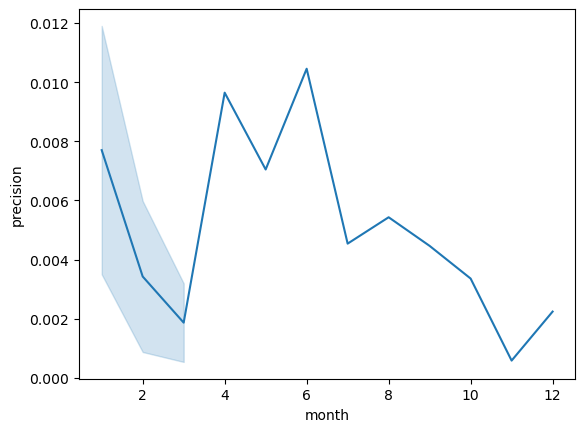

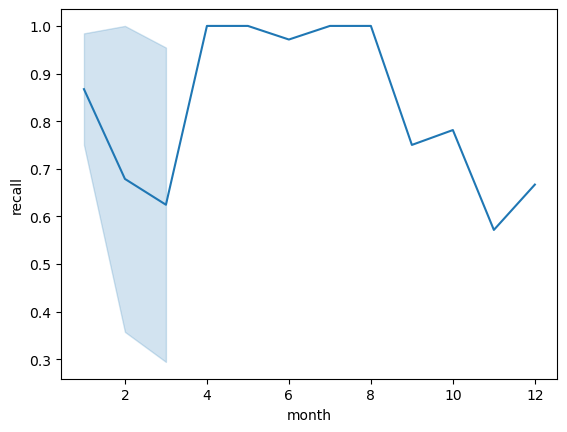

In [54]:
# Recall and precision by month
sns.lineplot(data = summary_metrics, x ='month', y = 'precision')
plt.show()
sns.lineplot(data = summary_metrics, x ='month', y= 'recall')
plt.show()

## Daily analysis

In [55]:
tes_corte_01['date_receiver'].dt.floor('d')

1017       2023-06-04
1379       2023-04-29
2474       2023-05-21
2778       2023-04-07
3421       2023-01-26
              ...    
32965495   2024-03-08
32965555   2024-03-01
32965756   2024-03-06
32966124   2024-03-07
32967184   2024-03-09
Name: date_receiver, Length: 34841, dtype: datetime64[ns]

In [56]:
ALERTAS_01 = pd.crosstab(tes_corte_01['date_receiver'].dt.floor('d'), Y_c_corte_01['targetF'])
ALERTAS_01.to_csv ('./alertas.csv')

In [57]:
ALERTAS_01

targetF,False,True
date_receiver,,
2023-01-01,17,0
2023-01-02,55,0
2023-01-03,52,0
2023-01-04,62,11
2023-01-05,53,19
...,...,...
2024-03-26,34,0
2024-03-27,74,0
2024-03-28,28,0


In [58]:
FRAUDES = pd.crosstab(testeo['date_receiver'].dt.floor('d'), Y_c['targetF'])
#FRAUDES.to_csv ('./fraudes.csv')

In [59]:
FRAUDES

targetF,False,True
date_receiver,,
2023-01-01,15754,0
2023-01-02,58123,0
2023-01-03,48448,0
2023-01-04,44212,11
2023-01-05,43613,20
...,...,...
2024-03-27,52849,0
2024-03-28,48518,0
2024-03-29,65119,0


## Busco fraudes q no faltan

In [60]:
faltantes = (testeo['id_receiver'].between(5631,5659)) & (testeo['id_branch'] =='A24793')
X_faltantes = testeo[faltantes]
Y_c_faltantes = Y_c[faltantes]
Y_c_faltantes[['pred_corte','pred_corte_01','pred_corte_02','pred_corte_03']].value_counts()

pred_corte  pred_corte_01  pred_corte_02  pred_corte_03
False       False          False          False            26
True        False          False          False             1
Name: count, dtype: int64

In [61]:
X_faltantes[var_input].describe()

,branch_minutes_since_last_transaction,branch_trans_3m,branch_has_fraud,branch_trans_40min,branch_trans_10min,cash_pick_up_40min,location_nro_fraud,sender_trans_3m,sender_nro_fraud,01_var_range_hist,sender_days_to_last_transaction_more7m,01_receiver_transaction_count,01_sender_sending_days,01_branch_working_days,01_net_amount_receiver,01_sender_minutes_since_last_transaction_2days,01_sender_days_to_last_transaction_365,01_sender_days_to_last_transaction_7m,01_hour_receiver
count,27.000000,27.000000,27.0,27.000000,27.000000,27.000000,27.0,27.000000,27.0,26.000000,27.0,27.000000,26.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,32.925926,1988.629630,0.0,2.740741,1.444444,0.555556,0.0,4.592593,0.0,1.765409,0.0,0.014425,0.237645,0.047055,0.327646,0.066705,0.031659,0.055026,0.836420
std,115.721790,5.949455,0.0,1.677741,0.847319,0.577350,0.0,3.399765,0.0,1.736687,0.0,0.042623,0.140596,0.000071,0.110936,0.235074,0.028445,0.049440,0.215246
min,1.000000,1979.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.526316,0.0,0.000000,0.001397,0.047017,0.073120,0.000000,0.000000,0.000000,0.375000
25%,2.000000,1985.500000,0.0,1.000000,1.000000,0.000000,0.0,2.000000,0.0,0.813457,0.0,0.000000,0.095321,0.047017,0.283341,0.000000,0.006849,0.011905,0.916667
50%,4.000000,1988.000000,0.0,4.000000,2.000000,1.000000,0.0,3.000000,0.0,1.221591,0.0,0.000000,0.308659,0.047017,0.336353,0.000000,0.019178,0.033333,0.958333
75%,5.000000,1990.000000,0.0,4.000000,2.000000,1.000000,0.0,7.000000,0.0,1.876323,0.0,0.000000,0.359637,0.047017,0.374741,0.000000,0.060274,0.104762,0.958333
max,602.000000,2001.000000,0.0,5.000000,3.000000,2.000000,0.0,13.000000,0.0,8.252632,0.0,0.168421,0.368715,0.047186,0.584962,0.995139,0.093151,0.161905,0.958333


In [62]:
#testeo.loc[(testeo['id_receiver'] ==5631) & (testeo['id_branch'] =='A24793')] 

testeo.loc[(testeo['id_receiver'].between(5631,5659)) & (testeo['id_branch'] =='A24793')] 

,id_branch,id_receiver,date_receiver,id_location,id_payer,id_sender_global,net_amount_receiver,id_country_receiver_claim,id_state_receiver_claim,id_state,branch_working_days,sender_sending_days,sender_days_to_last_transaction,id_country,fraud_classification,sender_minutes_since_last_transaction,branch_minutes_since_last_transaction,sender_days_since_last_transaction,branch_trans_3m,sender_state,branch_has_fraud,receiver_has_fraud,branch_trans_40min,branch_trans_10min,cash_pick_up_40min,location_nro_fraud,sender_trans_3m,range_hist,sender_nro_fraud,receiver_transaction_count,mes,hour_receiver,01_isMexico,01_sender_branch_state,01_var_range_hist,01_receiver_fraud,01_branch_fraud,01_location_fraud,01_sender_fraud,01_isCashPick,01_isBankDep,sender_days_to_last_transaction_365,sender_days_to_last_transaction_more365,sender_days_to_last_transaction_7m,sender_days_to_last_transaction_more7m,sender_minutes_since_last_transaction_2days,sender_minutes_since_last_transaction_1day,01_receiver_transaction_count,01_sender_sending_days,01_branch_working_days,01_net_amount_receiver,01_sender_minutes_since_last_transaction_2days,01_sender_minutes_since_last_transaction_1day,01_sender_days_to_last_transaction_365,01_sender_days_to_last_transaction_7m,01_hour_receiver,day_name_receiver_0,day_name_receiver_1,day_name_receiver_2,day_name_receiver_3,day_name_receiver_4,day_name_receiver_5,day_name_receiver_6,id_payout_A,id_payout_C,id_payout_D,id_payout_M,id_payout_N,id_payout_O,id_payout_P,id_payout_S,id_payout_T,id_payout_X,targetR,targetP,target,id_payout_G,year
30745840,A24793,5656,2024-03-22 10:11:13.040,TX1505,NN,10326891,900.0,GUA,GUA6,TX,266,263.0,33.0,USA,None,46982.0,10.0,0.0,2001.0,TX,0,0,2,0,2,0,2.0,800.000000,0,15.0,3,10,False,True,1.125000,False,False,False,False,True,False,33.0,0,33.0,0,0.0,0.0,0.147368,0.367318,0.047186,0.329041,0.000000,0.000000,0.090411,0.157143,0.416667,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2024
30961307,A24793,5644,2024-03-21 23:55:40.800,TX1505,NN,10339243,1150.0,MEX,MEX35,TX,265,259.0,14.0,USA,None,20943.0,2.0,0.0,1988.0,TX,0,0,4,2,1,0,2.0,800.000000,0,1.0,3,23,True,True,1.437500,False,False,False,False,False,True,14.0,0,14.0,0,0.0,0.0,0.000000,0.361732,0.047017,0.420442,0.000000,0.000000,0.038356,0.066667,0.958333,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2024
31213352,A24793,5640,2024-03-21 23:56:07.267,TX1505,NN,10345474,1450.0,MEX,MEX16,TX,265,258.0,6.0,USA,None,8925.0,1.0,0.0,1999.0,TX,0,0,5,3,1,0,7.0,1100.000000,0,1.0,3,23,True,True,1.318182,False,False,False,False,True,False,6.0,0,6.0,0,0.0,0.0,0.000000,0.360335,0.047017,0.530122,0.000000,0.000000,0.016438,0.028571,0.958333,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2024
31253540,A24793,5653,2024-03-21 23:55:40.800,TX1505,NN,10398602,650.0,MEX,MEX47,TX,265,184.0,7.0,USA,None,10558.0,2.0,0.0,1988.0,TX,0,0,4,2,1,0,2.0,800.000000,0,1.0,3,23,True,True,0.812500,False,False,False,False,False,True,7.0,0,7.0,0,0.0,0.0,0.000000,0.256983,0.047017,0.237641,0.000000,0.000000,0.019178,0.033333,0.958333,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2024
31321486,A24793,5637,2024-03-21 23:45:05.103,TX1505,NN,10314303,1600.0,MEX,MEX47,TX,265,264.0,0.0,USA,None,159.0,4.0,0.0,1985.0,NC,0,0,1,1,0,0,13.0,642.307692,0,1.0,3,23,True,False,2.491018,False,False,False,False,False,True,0.0,0,0.0,0,159.0,159.0,0.000000,0.368715,0.047017,0.584962,0.055208,0.110417,0.000000,0.000000,0.958333,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2024
31380509,A24793,5634,2024-03-21 22:18:05.113,TX1505,NN,10356048,650.0,MEX,MEX16,TX,265,255.0,2.0,USA,None,3030.0,4.0,0.0,1982.0,TX,0,0,4,2,0,0,9.

In [63]:
Y_c.loc[(testeo['id_receiver'].between(5631,5659)) & (testeo['id_branch'] =='A24793')] 

,day_name_receiver_0,day_name_receiver_1,day_name_receiver_2,day_name_receiver_3,day_name_receiver_4,day_name_receiver_5,day_name_receiver_6,target,preds_rf,score_rf,pred_corte,FRAUD_DECILE,fraud_classification,targetF,pred_corte_01,pred_corte_02,pred_corte_03,pred_corte_04
30745840,False,False,False,False,True,False,False,False,False,9.978932e-14,False,100,None,False,False,False,False,False
30961307,False,False,False,True,False,False,False,False,False,2.479706e-10,False,10,None,False,False,False,False,False
31213352,False,False,False,True,False,False,False,False,False,9.663473e-10,False,5,None,False,False,False,False,False
31253540,False,False,False,True,False,False,False,False,False,1.738374e-10,False,12,None,False,False,False,False,False
31321486,False,False,False,True,False,False,False,False,False,6.984373e-09,False,2,None,False,False,False,False,False
31380509,False,False,False,True,False,False,False,False,False,4.484131e-10,False,8,None,False,False,False,False,False
31619975,False,False,False,True,False,False,False,False,False,1.034870e-10,False,16,None,False,False,False,False,False
31639464,False,False,False,False,True,False,False,False,False,2.313116e-11,False,32,None,False,False,False,False,False
31657291,False,False,False,False,True,False,False,False,False,4.960255e-12,False,58,None,False,False,False,False,False
31740059,False,False,False,True,False,False,False,False,False,1.045834e-09,False,5,None,False,False,False,False,False


In [64]:
Y_c.loc[(testeo['id_receiver'].between(1783,1783)) & (testeo['id_branch'] =='A20109'),'pred_corte_01'] 

31754334    True
Name: pred_corte_01, dtype: bool

In [65]:
faltantes = (testeo['id_receiver'].between(174,178)) & (testeo['id_branch'] =='A25879')
X_faltantes = testeo[faltantes]
Y_c_faltantes = Y_c[faltantes]
Y_c_faltantes[['pred_corte','pred_corte_01','pred_corte_02','pred_corte_03']].value_counts()

Series([], Name: count, dtype: int64)

In [66]:
testeo[(testeo['id_branch']=='A24570') & (testeo['id_receiver']==1883)]
testeo[(testeo['id_branch']=='A24570') & (testeo['id_receiver']==1883)]

,id_branch,id_receiver,date_receiver,id_location,id_payer,id_sender_global,net_amount_receiver,id_country_receiver_claim,id_state_receiver_claim,id_state,branch_working_days,sender_sending_days,sender_days_to_last_transaction,id_country,fraud_classification,sender_minutes_since_last_transaction,branch_minutes_since_last_transaction,sender_days_since_last_transaction,branch_trans_3m,sender_state,branch_has_fraud,receiver_has_fraud,branch_trans_40min,branch_trans_10min,cash_pick_up_40min,location_nro_fraud,sender_trans_3m,range_hist,sender_nro_fraud,receiver_transaction_count,mes,hour_receiver,01_isMexico,01_sender_branch_state,01_var_range_hist,01_receiver_fraud,01_branch_fraud,01_location_fraud,01_sender_fraud,01_isCashPick,01_isBankDep,sender_days_to_last_transaction_365,sender_days_to_last_transaction_more365,sender_days_to_last_transaction_7m,sender_days_to_last_transaction_more7m,sender_minutes_since_last_transaction_2days,sender_minutes_since_last_transaction_1day,01_receiver_transaction_count,01_sender_sending_days,01_branch_working_days,01_net_amount_receiver,01_sender_minutes_since_last_transaction_2days,01_sender_minutes_since_last_transaction_1day,01_sender_days_to_last_transaction_365,01_sender_days_to_last_transaction_7m,01_hour_receiver,day_name_receiver_0,day_name_receiver_1,day_name_receiver_2,day_name_receiver_3,day_name_receiver_4,day_name_receiver_5,day_name_receiver_6,id_payout_A,id_payout_C,id_payout_D,id_payout_M,id_payout_N,id_payout_O,id_payout_P,id_payout_S,id_payout_T,id_payout_X,targetR,targetP,target,id_payout_G,year
16726691,A24570,1883,2023-09-01 19:33:58.957,NY1438,T085,10617643,128.0,GUA,GUA11,NY,57,NaN,0.0,USA,None,0.0,6.0,0.0,1806.0,NY,0,0,7,2,7,0,0.0,NaN,0,4.0,9,19,False,True,NaN,False,False,False,False,True,False,0.0,0,0.0,0,0.0,0.0,0.029703,NaN,0.025658,0.046209,0.0,0.0,0.0,0.0,0.791667,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,2023


In [67]:
s3_url = f"viamericas-datalake-dev-us-east-1-283731589572-raw/FraudModel/Data4Model/TargetTodos"
tes = pd.read_parquet(f"s3://{s3_url}/Data2024/Faltantes.parquet")

testeo2 = tes
Y_target2 = pd.DataFrame(tes['target']) 

In [68]:
testeo2['01_var_range_hist'] = testeo.loc[(testeo['id_branch']=='A24570') & (testeo['id_receiver']==1883),'01_var_range_hist']
testeo2['01_var_range_hist'] 

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
Name: 01_var_range_hist, dtype: float64

In [69]:
testeo2[var_input]

,branch_minutes_since_last_transaction,branch_trans_3m,branch_has_fraud,branch_trans_40min,branch_trans_10min,cash_pick_up_40min,location_nro_fraud,sender_trans_3m,sender_nro_fraud,01_isMexico,01_sender_branch_state,01_var_range_hist,01_branch_fraud,01_location_fraud,01_sender_fraud,01_isCashPick,01_isBankDep,sender_days_to_last_transaction_more7m,01_receiver_transaction_count,01_sender_sending_days,01_branch_working_days,01_net_amount_receiver,01_sender_minutes_since_last_transaction_2days,01_sender_days_to_last_transaction_365,01_sender_days_to_last_transaction_7m,01_hour_receiver
0,6,1975,0,1,1,1,0,0,0,True,False,NaN,False,False,False,False,True,0,0.0,0,0.047017,1.000000,0.0,0.0,0.0,0.833333
1,15,1974,0,2,0,1,0,0,0,True,True,NaN,False,False,False,False,True,0,0.0,0,0.047017,0.694642,0.0,0.0,0.0,0.833333
2,7,1977,0,4,0,3,0,0,0,True,True,NaN,False,False,False,False,True,0,0.0,0,0.047017,1.000000,0.0,0.0,0.0,0.875000
3,12,169,0,1,0,0,0,0,0,True,False,NaN,False,False,False,False,True,0,0.0,0,0.015672,0.182801,0.0,0.0,0.0,0.500000
4,2833,168,0,0,0,0,0,0,0,True,True,NaN,False,False,False,False,True,0,0.0,0,0.015672,0.347321,0.0,0.0,0.0,0.500000
5,11,170,0,2,0,0,0,0,0,True,True,NaN,False,False,False,False,True,0,0.0,0,0.015672,0.358289,0.0,0.0,0.0,0.500000
6,20,171,0,2,0,0,0,0,0,True,True,NaN,False,False,False,False,True,0,0.0,0,0.015672,0.467970,0.0,0.0,0.0,0.541667


In [70]:
testeo_data_pred_rf2 = modelo.predict(testeo2[var_input])
probab_rf2 = modelo.predict_proba(testeo2[var_input])
score_rf2 = np.delete(probab_rf2, np.s_[0], axis=1)

Y_c2 = Y_target2.copy()
Y_c2['preds_rf'] = testeo_data_pred_rf2
Y_c2['score_rf'] = score_rf2


In [71]:
Y_c2

,target,preds_rf,score_rf
0,True,False,3.552636e-09
1,True,False,2.790345e-08
2,True,False,3.061658e-10
3,False,False,3.794542e-09
4,False,False,2.298804e-08
5,False,False,7.081999e-10
6,False,False,2.192155e-09


In [72]:
Y_c2['pred_corte_01'] = Y_c2['score_rf']>corte_01
pd.DataFrame(confusion_matrix(Y_c2['target'], Y_c2['pred_corte_01']))

,0,1
0,4,0
1,3,0


In [73]:
Y_c2['pred_corte_02'] = Y_c2['score_rf']>corte_02
pd.DataFrame(confusion_matrix(Y_c2['target'], Y_c2['pred_corte_02']))

,0,1
0,4,0
1,3,0


In [74]:
Y_c2['pred_corte'] = Y_c2['score_rf']>corte
pd.DataFrame(confusion_matrix(Y_c2['target'], Y_c2['pred_corte']))

,0,1
0,3,1
1,2,1


## Transformo los datos para subirlos a Athena

In [85]:
# Import pandas
import pandas as pd
 
# reading csv file 
Buckets = pd.read_csv('./BucketsModeloBite.csv')
Buckets.head()


,Unnamed: 0,FRAUD_DECILE,level_1,min,max,final_score
0,0,1,score_rf,1.026961e-06,1.000000e+00,0.999
1,1,2,score_rf,3.182219e-07,1.026870e-06,0.998
2,2,3,score_rf,1.543105e-07,3.181829e-07,0.997
3,3,4,score_rf,9.298101e-08,1.543048e-07,0.996
4,4,5,score_rf,6.214492e-08,9.297951e-08,0.995


None


In [155]:
# Create bins from reference dataframe
pd.options.display.float_format = "{:,.10f}".format
# Convert data types of 'Min_Value' and 'Max_Value' to numeric
Buckets['min'] = pd.to_numeric(Buckets['min'])
#Buckets['max'] = pd.to_numeric(Buckets['max'])

#bins = np.sort(np.append(Buckets['min'], np.inf))
bins = np.sort(np.append(Buckets['Min_Value'], Buckets['Max_Value'].iloc[-1]))[::-1]
# Recode scores using pd.cut()
#bins = np.sort(np.append(Buckets['min'], Buckets['max']))

# Recode scores using pd.cut()
Y_c['Recode'] = pd.cut(Y_c['score_rf'], bins=bins, labels=Buckets['final_score'])
#Y_c['Recode'] = pd.cut(Y_c['score_rf'], bins=bins)


print(Y_c.head())

   day_name_receiver_0  day_name_receiver_1  day_name_receiver_2  \
0                False                False                 True   
1                False                False                False   
2                False                False                False   
3                 True                False                False   
4                False                False                False   

   day_name_receiver_3  day_name_receiver_4  day_name_receiver_5  \
0                False                False                False   
1                False                False                 True   
2                False                False                 True   
3                False                False                False   
4                False                False                 True   

   day_name_receiver_6  target  preds_rf     score_rf  pred_corte  \
0                False   False     False 0.0000000001       False   
1                False   False     False 0.0

In [156]:
Buckets

,Unnamed: 0,FRAUD_DECILE,level_1,min,max,final_score
0,0,1,score_rf,0.0000010270,0.9999999842,0.9990000000
1,1,2,score_rf,0.0000003182,0.0000010269,0.9980000000
2,2,3,score_rf,0.0000001543,0.0000003182,0.9970000000
3,3,4,score_rf,0.0000000930,0.0000001543,0.9960000000
4,4,5,score_rf,0.0000000621,0.0000000930,0.9950000000
...,...,...,...,...,...,...
995,995,996,score_rf,0.0000000000,0.0000000000,0.0040000000
996,996,997,score_rf,0.0000000000,0.0000000000,0.0030000000
997,997,998,score_rf,0.0000000000,0.0000000000,0.0020000000
998,998,999,score_rf,0.0000000000,0.0000000000,0.0010000000


In [157]:
#pd.DataFrame(confusion_matrix(Y_c['Recode'], Y_c['Recode']))
Y_c.Recode[Y_c['pred_corte_01']==True].value_counts()

Recode
0.0000000000    34151
0.0010000000      690
0.3280000000        0
0.3410000000        0
0.3400000000        0
                ...  
0.6610000000        0
0.6600000000        0
0.6590000000        0
0.6580000000        0
0.4990000000        0
Name: count, Length: 1000, dtype: int64

In [122]:
Y_c[['score_rf','Recode','pred_corte_01']]

,score_rf,Recode,pred_corte_01
0,7.723406e-11,0.209,False
1,4.640643e-13,0.944,False
2,9.384587e-13,0.887,False
3,1.058074e-11,0.499,False
4,1.419879e-11,0.447,False
...,...,...,...
32967284,1.917502e-11,0.397,False
32967285,2.326715e-11,0.366,False
32967286,2.847323e-12,0.735,False
32967287,1.597623e-12,0.823,False
